In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

In [3]:
# Load the Twitter data
data = pd.read_csv("Tweets.csv")

In [4]:
# Encode sentiment labels
sentiment_mapping = {'positive': 2, 'neutral': 1, 'negative': 0}
data['airline_sentiment'] = data['airline_sentiment'].map(sentiment_mapping)


In [5]:
# Tokenization and Vectorization
max_words = 10000  # Maximum number of words to keep based on frequency
max_len = 100      # Maximum length of sequences

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(data['text'])
sequences = tokenizer.texts_to_sequences(data['text'])
padded_sequences = pad_sequences(sequences, maxlen=max_len)

In [6]:
# Split the data into train, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, data['airline_sentiment'], test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

# Display the shapes of the training and testing sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (10540, 100)
Shape of X_test: (2928, 100)
Shape of y_train: (10540,)
Shape of y_test: (2928,)


In [7]:
# Model Definition
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(max_words, 16, input_length=max_len),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')  # Output layer with 3 classes
])

In [8]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [12]:
# Model Training
history = model.fit(X_train, y_train,
                    epochs=100,
                    batch_size=32,
                    validation_data=(X_val, y_val))


Epoch 1/100
330/330 [==============================] - 2s 5ms/step - loss: 0.0357 - accuracy: 0.9915 - val_loss: 1.5347 - val_accuracy: 0.7235
Epoch 2/100
330/330 [==============================] - 1s 4ms/step - loss: 0.0324 - accuracy: 0.9926 - val_loss: 1.6260 - val_accuracy: 0.7278
Epoch 3/100
330/330 [==============================] - 1s 4ms/step - loss: 0.0302 - accuracy: 0.9928 - val_loss: 1.7103 - val_accuracy: 0.7363
Epoch 4/100
330/330 [==============================] - 1s 4ms/step - loss: 0.0283 - accuracy: 0.9933 - val_loss: 1.8177 - val_accuracy: 0.7363
Epoch 5/100
330/330 [==============================] - 2s 5ms/step - loss: 0.0291 - accuracy: 0.9930 - val_loss: 1.8780 - val_accuracy: 0.7295
Epoch 6/100
330/330 [==============================] - 1s 4ms/step - loss: 0.0266 - accuracy: 0.9934 - val_loss: 1.9083 - val_accuracy: 0.7295
Epoch 7/100
330/330 [==============================] - 1s 4ms/step - loss: 0.0249 - accuracy: 0.9938 - val_loss: 1.9532 - val_accuracy: 0.7321

In [13]:
# Model Evaluation
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_accuracy)


92/92 [==============================] - 0s 3ms/step - loss: 4.7554 - accuracy: 0.6793
Test Accuracy: 0.6793032884597778


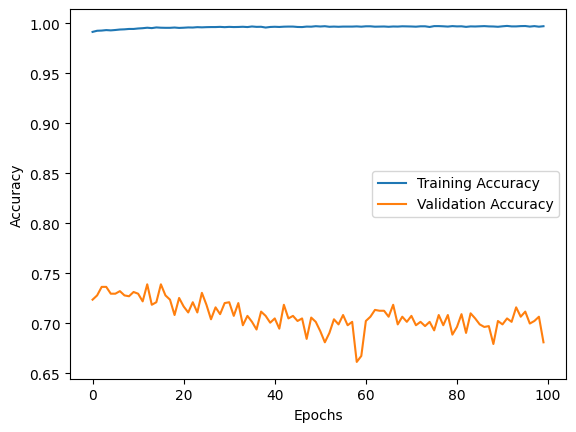

In [14]:
# Plot training history
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()